In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
nrows = None

names = ["username", "gameid", "userrating", "own", "prevowned", "fortrade", "want", 
         "wanttoplay", "wanttobuy", "wishlist", "wishlistpriority", "preordered", 
         "numplays", "lastmodified"]

data = pd.read_csv("../data/userinfo.csv", nrows=nrows, names=names)

In [53]:
print(f"Records:      {len(data.index):,.0f}")
print(f"Unique users: {len(data.username.unique()):,.0f}")
print(f"Unique games: {len(data.gameid.unique()):,.0f}")

Records:      7,713,598
Unique users: 31,541
Unique games: 62,643


# Users

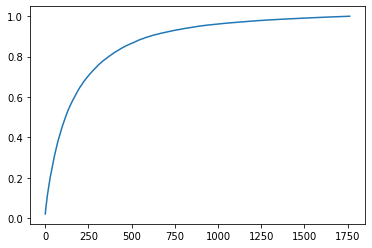

In [54]:
total_users = len(data.username.unique())

data\
    .groupby("username", as_index=False)["gameid"]\
    .count()\
    .rename({"gameid": "gamecount"}, axis="columns")\
    .sort_values("gamecount", ascending=False)\
    .groupby("gamecount", as_index=False)["username"]\
    .count()\
    .assign(prop_users=lambda row: row["username"] / total_users)\
    .prop_users\
    .cumsum()\
    .plot()